In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import sys
sys.path.append('../')
import experiments

curves = 9
curve_labels = ['Unregularized 1/4x', 'Unregularized 1x', 'Unregularized 4x', 'All Regularizers 1/4x',
                'All Regularizers 1x', 'All Regularizers 4x', 'Random Labels 1/4x', 'Random Labels 1x',
                'Random Labels 4x']
curve_colors = ['lightblue', 'blue', 'darkblue', 'lightgreen', 'limegreen', 'darkgreen', 'salmon', 'red', 'darkred']
layers = 4

results = [[0 for j in range(curves)] for i in range(layers)]
results_test = [[0 for j in range(curves)] for i in range(layers)]

included_nets = [62, 63, 67, 74, 75, 79, 86, 87, 91]

for ID in included_nets:

    print('Processing ID:', ID)
    opt = experiments.opt[ID]

    curve_idx = 0  # unregularized, small
    if opt.hyper.augmentation:  # all regularizers
        curve_idx += 3
    if opt.dataset.random_labels:
        curve_idx += 6  # random labels
    if opt.dnn.neuron_multiplier[0] == 1:
        curve_idx += 1
    elif opt.dnn.neuron_multiplier[0] == 4:
        curve_idx += 2

    data_dir = experiments.opt[ID].log_dir_base + experiments.opt[ID].name

    with open(data_dir + '/corr0.pkl', 'rb') as f:
        corr = pickle.load(f)
    corr = [corr[i].flatten() for i in range(len(corr))]
    corr = [corr[i][corr[i]<0.99999] for i in range(len(corr))]  # this is awful it's to work around a numpy problem with precision
    for layer in range(layers):
        results[layer][curve_idx] = corr[layer]
    with open(data_dir + '/corr_test0.pkl', 'rb') as f:
        corr_test = pickle.load(f)
    corr_test = [corr[i].flatten() for i in range(len(corr))]
    corr_test = [corr[i][corr[i]<0.99999] for i in range(len(corr))]  # this is awful it's to work around a numpy problem with precision
    for layer in range(layers):
        results_test[layer][curve_idx] = corr_test[layer]

Processing ID: 62
Processing ID: 63
Processing ID: 67
Processing ID: 74
Processing ID: 75
Processing ID: 79
Processing ID: 86
Processing ID: 87
Processing ID: 91


/cm/shared/openmind/anaconda/2.5.0/lib/python3.5/site-packages/ipykernel/__main__.py:40: RuntimeWarning: invalid value encountered in less


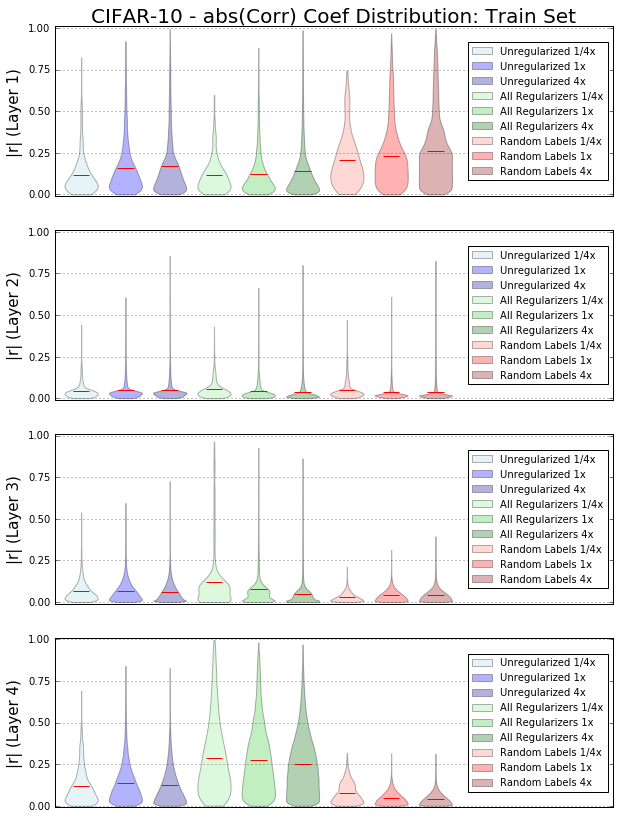

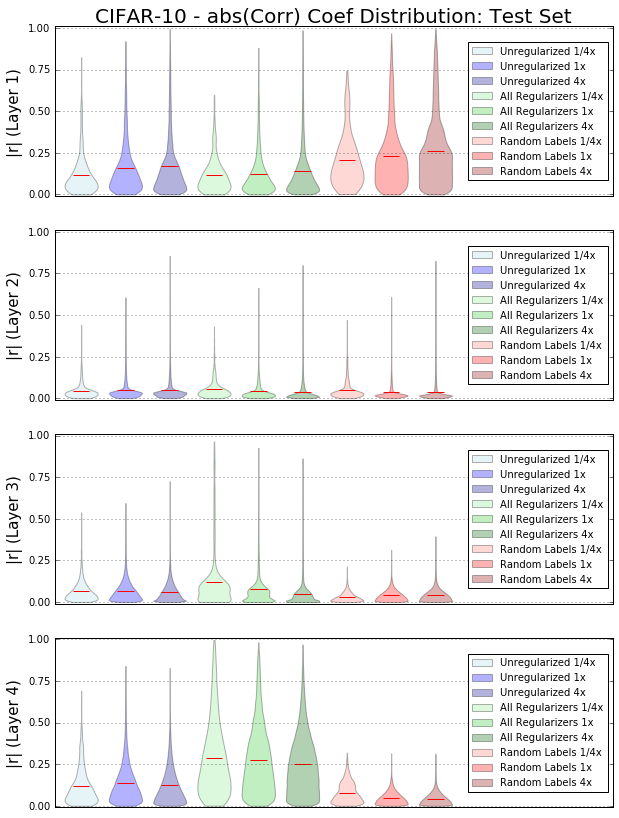

In [3]:
# first plot train r distributions

% matplotlib inline
'''
plt.figure(figsize=(10, 14))

plt.subplot(4, 1, 1)
plt.title('CIFAR-10 - Corr Coef Distribution: Train Set', fontsize=25)
plt.ylabel('r (Layer 1)', fontsize=15)
plt.grid(True, which='both', axis='y', c='black')
plt.xlim((0.4, curves+4))
plt.ylim((-1.01, 1.01))
plt.xticks([])
plt.yticks([-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1], fontsize=10)
violin_parts = plt.violinplot([results[0][i] for i in range(len(results[0]))], 
                              positions=[i for i in range(1, len(results[0])+1)], 
                              widths=0.75, showmeans=False, showmedians=False, showextrema=False)
for i, pc in enumerate(violin_parts['bodies']):
    pc.set_facecolor(curve_colors[i])
    pc.set_edgecolor('black')
plt.legend(curve_labels, loc='center right', fontsize=10)

for layer in range(1, layers):
    plt.subplot(4, 1, layer+1)
    plt.ylabel('r (Layer '+str(layer+1)+')', fontsize=15)
    plt.grid(True, which='both', axis='y', c='black')
    plt.xlim((0.4, curves+4))
    plt.ylim((-1.01, 1.01))
    plt.xticks([])
    plt.yticks([-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1], fontsize=10)
    violin_parts = plt.violinplot([results[layer][i] for i in range(len(results[layer]))], 
                                  positions=[i for i in range(1, len(results[layer])+1)], 
                                  widths=0.75, showmeans=False, showmedians=False, showextrema=False)
    for i, pc in enumerate(violin_parts['bodies']):
        pc.set_facecolor(curve_colors[i])
        pc.set_edgecolor('black')
    plt.legend(curve_labels, loc='center right', fontsize=10)

plt.show()

# second plot test r distributions

plt.figure(figsize=(10, 14))

plt.subplot(4, 1, 1)
plt.title('CIFAR-10 - Corr Coef Distribution: Test Set', fontsize=25)
plt.ylabel('r (Layer 1)', fontsize=15)
plt.grid(True, which='both', axis='y', c='black')
plt.xlim((0.4, curves+4))
plt.ylim((-1.01, 1.01))
plt.xticks([])
plt.yticks([-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1], fontsize=10)
violin_parts = plt.violinplot([results_test[0][i] for i in range(len(results_test[0]))], 
                              positions=[i for i in range(1, len(results_test[0])+1)], 
                              widths=0.75, showmeans=False, showmedians=False, showextrema=False)
for i, pc in enumerate(violin_parts['bodies']):
    pc.set_facecolor(curve_colors[i])
    pc.set_edgecolor('black')
plt.legend(curve_labels, loc='center right', fontsize=10)

for layer in range(1, layers):
    plt.subplot(4, 1, layer+1)
    plt.ylabel('r (Layer '+str(layer+1)+')', fontsize=15)
    plt.grid(True, which='both', axis='y', c='black')
    plt.xlim((0.4, curves+4))
    plt.ylim((-1.01, 1.01))
    plt.xticks([])
    plt.yticks([-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1], fontsize=10)
    violin_parts = plt.violinplot([results_test[layer][i] for i in range(len(results_test[layer]))], 
                                  positions=[i for i in range(1, len(results_test[layer])+1)], 
                                  widths=0.75, showmeans=False, showmedians=False, showextrema=False)
    for i, pc in enumerate(violin_parts['bodies']):
        pc.set_facecolor(curve_colors[i])
        pc.set_edgecolor('black')
    plt.legend(curve_labels, loc='center right', fontsize=10)

plt.show()
'''

plt.figure(figsize=(10, 14))

plt.subplot(4, 1, 1)
plt.title('CIFAR-10 - abs(Corr) Coef Distribution: Train Set', fontsize=20)
plt.ylabel('|r| (Layer 1)', fontsize=15)
plt.grid(True, which='both', axis='y', c='black')
plt.xlim((0.4, curves+4))
plt.ylim((-0.01, 1.01))
plt.xticks([])
plt.yticks([0, 0.25, 0.5, 0.75, 1], fontsize=10)
violin_parts = plt.violinplot([np.abs(results[0][i]) for i in range(len(results[0]))], 
                              positions=[i for i in range(1, len(results[0])+1)], 
                              widths=0.9, showmeans=True, showmedians=False, showextrema=False)
for i, pc in enumerate(violin_parts['bodies']):
    pc.set_facecolor(curve_colors[i])
    pc.set_edgecolor('black')
plt.legend(curve_labels, loc='center right', fontsize=10)

for layer in range(1, layers):
    plt.subplot(4, 1, layer+1)
    plt.ylabel('|r| (Layer '+str(layer+1)+')', fontsize=15)
    plt.grid(True, which='both', axis='y', c='black')
    plt.xlim((0.4, curves+4))
    plt.ylim((-0.01, 1.01))
    plt.xticks([])
    plt.yticks([0, 0.25, 0.5, 0.75, 1], fontsize=10)
    violin_parts = plt.violinplot([np.abs(results[layer][i]) for i in range(len(results[layer]))], 
                                  positions=[i for i in range(1, len(results[layer])+1)], 
                                  widths=0.9, showmeans=True, showmedians=False, showextrema=False)
    for i, pc in enumerate(violin_parts['bodies']):
        pc.set_facecolor(curve_colors[i])
        pc.set_edgecolor('black')
    plt.legend(curve_labels, loc='center right', fontsize=10)

plt.show()

# second plot test r distributions

plt.figure(figsize=(10, 14))

plt.subplot(4, 1, 1)
plt.title('CIFAR-10 - abs(Corr) Coef Distribution: Test Set', fontsize=20)
plt.ylabel('|r| (Layer 1)', fontsize=15)
plt.grid(True, which='both', axis='y', c='black')
plt.xlim((0.4, curves+4))
plt.ylim((-0.01, 1.01))
plt.xticks([])
plt.yticks([0, 0.25, 0.5, 0.75, 1], fontsize=10)
violin_parts = plt.violinplot([np.abs(results_test[0][i]) for i in range(len(results_test[0]))], 
                              positions=[i for i in range(1, len(results_test[0])+1)], 
                              widths=0.9, showmeans=True, showmedians=False, showextrema=False)
for i, pc in enumerate(violin_parts['bodies']):
    pc.set_facecolor(curve_colors[i])
    pc.set_edgecolor('black')
plt.legend(curve_labels, loc='center right', fontsize=10)

for layer in range(1, layers):
    plt.subplot(4, 1, layer+1)
    plt.ylabel('|r| (Layer '+str(layer+1)+')', fontsize=15)
    plt.grid(True, which='both', axis='y', c='black')
    plt.xlim((0.4, curves+4))
    plt.ylim((-0.01, 1.01))
    plt.xticks([])
    plt.yticks([0, 0.25, 0.5, 0.75, 1], fontsize=10)
    violin_parts = plt.violinplot([np.abs(results_test[layer][i]) for i in range(len(results_test[layer]))], 
                                  positions=[i for i in range(1, len(results_test[layer])+1)], 
                                  widths=0.9, showmeans=True, showmedians=False, showextrema=False)
    for i, pc in enumerate(violin_parts['bodies']):
        pc.set_facecolor(curve_colors[i])
        pc.set_edgecolor('black')
    plt.legend(curve_labels, loc='center right', fontsize=10)

plt.show()
